In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier


In [ ]:
data=pd.read_csv('/content/car_evaluation.csv')
data.head()
data.columns
data.columns=['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Class']
data.head()
print(f'Rows : {data.shape[0]}')
print(f'Columns : {data.shape[1]}')


Rows : 1727
Columns : 7


In [ ]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Buying    1727 non-null   object
 1   Maint     1727 non-null   object
 2   Doors     1727 non-null   object
 3   Persons   1727 non-null   object
 4   Lug_boot  1727 non-null   object
 5   Safety    1727 non-null   object
 6   Class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Features:
1. **Buying**: Buying price (categorical)  
2. **Maint**: Maintenance cost (categorical)  
3. **Doors**: Number of doors (categorical)  
4. **Persons**: Capacity in terms of persons (categorical)  
5. **Lug_boot**: Size of the luggage boot (categorical)  
6. **Safety**: Safety rating (categorical)  
7. **Class**: The target variable indicating the car's acceptability (categorical)  

Target Variable Class

In [ ]:
data.Class.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

Classifies the car Evaluation into 4 categories.
1. Unacceptable
2.Acceptable
3.Vgood
4.good

Characteristics of Dataset.
1. The dataset has no missing values as all data is populated.
2. All features are categorical.
3. Represents a classification problem whether to accept the car based upon its features.

Data Preposseing. Checking for Missing values

In [ ]:
data.isna().sum()

,0
Buying,0
Maint,0
Doors,0
Persons,0
Lug_boot,0
Safety,0
Class,0


### Identifying and selecting the most relevant features for your model.

- ### Selected Features:
    1. **Safety**: Safety rating is crucial for car evaluation, as higher safety is often associated with better acceptability.  
    2. **Buying**: The buying price reflects affordability, a key factor in car decision-making.  
    3. **Maint**: Maintenance cost affects the long-term cost of ownership, making it a relevant feature.  
    4. **Persons**: The seating capacity is essential for practical usability, especially for families.  

- ### Explanation:
    - These features directly impact a customer's perception of a car's value and acceptability.  
    - Features like `Safety`, `Buying`, and `Maint` cover the financial and safety aspects, while `Persons` addresses usability.
    - Features like `Lug_boot` (luggage boot size) and `Doors` (number of doors) were excluded due to their comparatively lower relevance in influencing the acceptability score based on preliminary exploration.  

By selecting these features, the model focuses on the most impactful aspects of car evaluation, potentially improving its predictive performance.


In [ ]:
#Encoding categorical features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data=data.apply(le.fit_transform)
data.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


# Splitting Features and Target variable

In [ ]:
X=data.drop('Class',axis=1)
Y=data['Class']
print(X)
print(Y)

      Buying  Maint  Doors  Persons  Lug_boot  Safety
0          3      3      0        0         2       2
1          3      3      0        0         2       0
2          3      3      0        0         1       1
3          3      3      0        0         1       2
4          3      3      0        0         1       0
...      ...    ...    ...      ...       ...     ...
1722       1      1      3        2         1       2
1723       1      1      3        2         1       0
1724       1      1      3        2         0       1
1725       1      1      3        2         0       2
1726       1      1      3        2         0       0

[1727 rows x 6 columns]
0       2
1       2
2       2
3       2
4       2
       ..
1722    1
1723    3
1724    2
1725    1
1726    3
Name: Class, Length: 1727, dtype: int64


Splitting the dataset into training and testing sets of 80,20

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1381, 6)
(346, 6)
(1381,)
(346,)


3. Decision Tree Implementation
Training a Decision Tree Classifier on Training Data

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

Using the model to make predictions

In [ ]:
Pred=model.predict(X_test)

### Visualizing the Decision Tree using available plotting libraries.

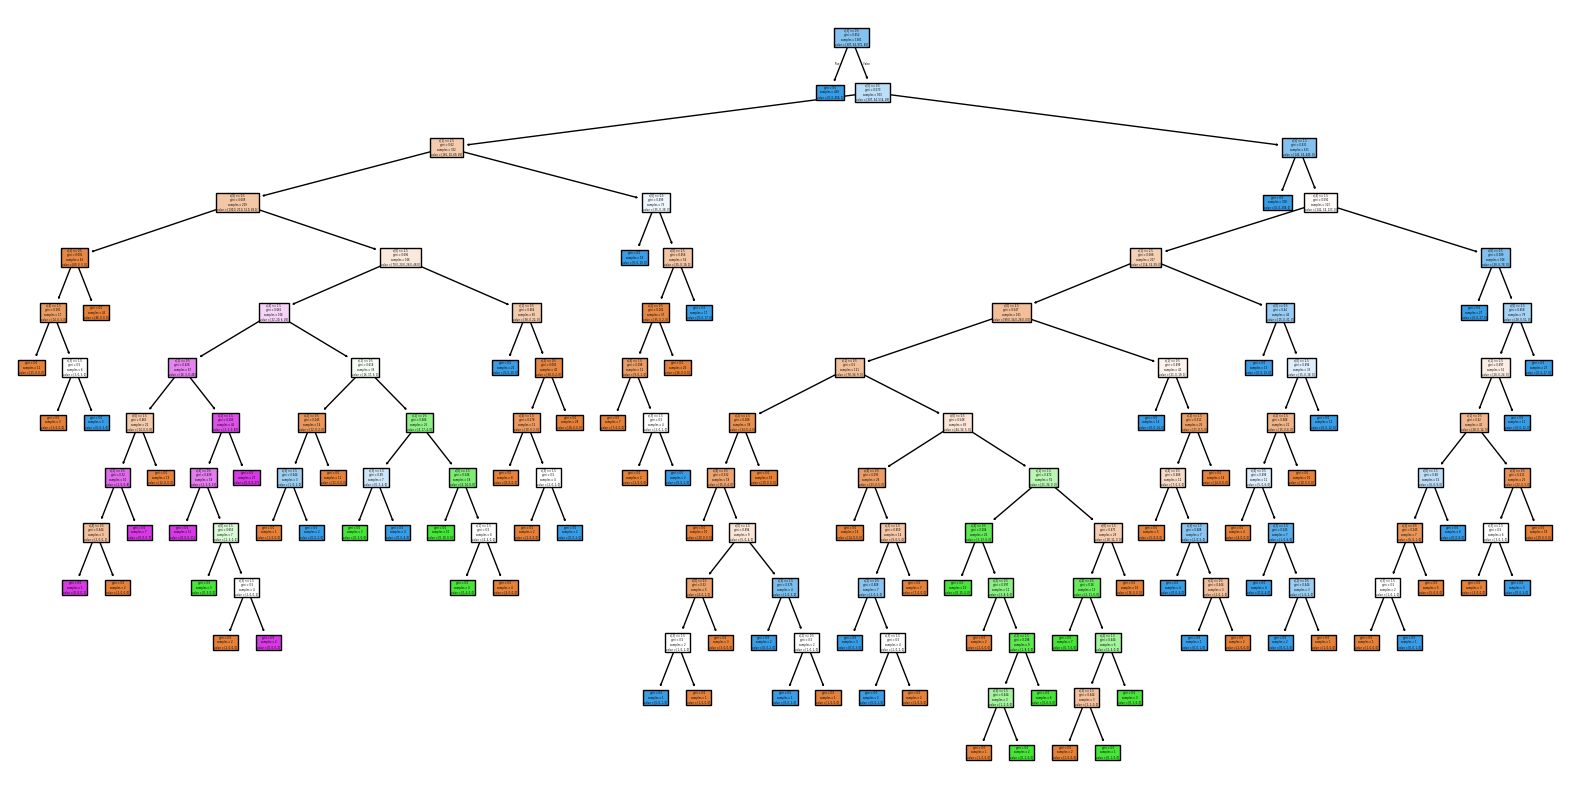

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model,filled=True)
plt.show()

### Discussing the splitting criteria and the tree structure, explaining key decisions made by the algorithm.

- ### Splitting Criteria:
 - **Gini Impurity**: The Decision Tree algorithm uses Gini Impurity as the splitting criterion. It selects features and thresholds that minimize the impurity of the resulting child nodes, ensuring the most homogeneous splits at each decision point.
 - **Feature Selection**: At each node, the algorithm evaluates all features and selects the one that provides the best split based on the reduction in Gini Impurity.

- ### Tree Structure:
 1. **Root Node**: The root node represents the entire dataset. The first split is made using the feature that most effectively separates the data into homogeneous groups (e.g., `Safety` or `Buying`).
 2. **Intermediate Nodes**: These nodes represent subsets of the data further divided using additional features. Each split maximizes information gain at that level.
 3. **Leaf Nodes**: Leaf nodes represent final predictions. Each leaf contains the majority class for the subset of data it represents.

- ### Key Decisions Made by the Algorithm:
 1. **Feature Importance**: The algorithm prioritizes features that most strongly influence the target variable (e.g., `Safety` might be the most decisive feature for car acceptability).
 2. **Threshold Selection**: For numeric features, optimal thresholds are calculated (e.g., splitting on a specific safety rating value).
 3. **Stopping Criteria**: The tree stops growing when:
   - Maximum depth is reached.
   - Further splits do not reduce impurity significantly.
   - Leaf nodes contain fewer samples than the minimum threshold.

- ### Discussion:
 - The tree's structure is influenced by the distribution of the data and the feature interactions.
 - While the Decision Tree is interpretable and can highlight key decision paths, it may overfit the data if not pruned or regularized.
 - Features like `Safety` and `Maint` might dominate the splits, reflecting their importance in predicting car acceptability.


# 4. Random Forest Implementation:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_predictions = rf_model.predict(X_test)

### Comparing the Random Forest model's structure with the Decision Tree.

### Key Differences in Structure:

### Decision Tree:
1. **Single Tree Structure**:
   - A Decision Tree is a single tree that splits the dataset using the best features to minimize impurity at each node.
   - It is prone to overfitting, especially if the tree grows too deep.

2. **Feature Usage**:
   - The Decision Tree uses all features during its training and relies heavily on the most dominant features at each split.

3. **Interpretability**:
   - Easy to interpret and visualize due to its straightforward structure.

4. **Stability**:
   - Sensitive to small changes in the dataset, which can significantly alter the tree's structure.

### Random Forest:
1. **Ensemble of Trees**:
   - The Random Forest is a collection of multiple decision trees (typically trained on bootstrapped samples of the data).
   - It uses aggregation techniques (like majority voting or averaging) to make final predictions, improving robustness.

2. **Feature Randomization**:
   - Each tree in the forest is trained on a random subset of features, reducing the risk of overfitting and encouraging diversity among trees.

3. **Interpretability**:
   - While individual trees in the Random Forest can be interpreted, the overall model is less interpretable due to the ensemble structure.

4. **Stability**:
   - Random Forest is much more stable and resistant to noise or small changes in the dataset compared to a single Decision Tree.

### Performance and Generalization:
- **Decision Tree**: Often performs well on training data but may struggle to generalize due to overfitting.
- **Random Forest**: Typically generalizes better due to averaging predictions across multiple trees, reducing overfitting.

### Feature Importance:
- Random Forest provides a more robust estimate of feature importance since it considers multiple decision paths across all trees, while the Decision Tree relies solely on a single structure.

### Conclusion:
- Random Forest outperforms Decision Trees in most cases due to its ensemble nature and resistance to overfitting.
- Decision Trees remain valuable for interpretability and understanding data patterns but may require pruning or other regularization techniques to prevent overfitting.


# 5. Model Comparison:
### Comparing the predictions made by both models on the test data.

In [ ]:
print(f'Decision Tree Accuracy : {accuracy_score(Y_test,Pred)}')
print(f'Random Forest Accuracy : {accuracy_score(Y_test,rf_predictions)}')

Decision Tree Accuracy : 0.9710982658959537
Random Forest Accuracy : 0.9624277456647399


### Discussing which model seems to perform better and why, based on observations from the data.

Decision Tree Accuracy :0.9711 almost 97%
Random Forest Accuracy :0.9624 almost 96%

Conclusion :
Decision Tree is bit better in terms of accuracy.
In this specific case, both models perform equally well in terms of accuracy. However, the Random Forest would likely generalize better to unseen data due to its ensemble approach, making it the preferred model for most real-world scenarios. For simpler problems or when computational resources are limited, the Decision Tree might still be a viable option.  

# 6. Feature Importance Analysis:

### Analyzing and plot the feature importance scores from the Random Forest model.

In [ ]:
feature_importance = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

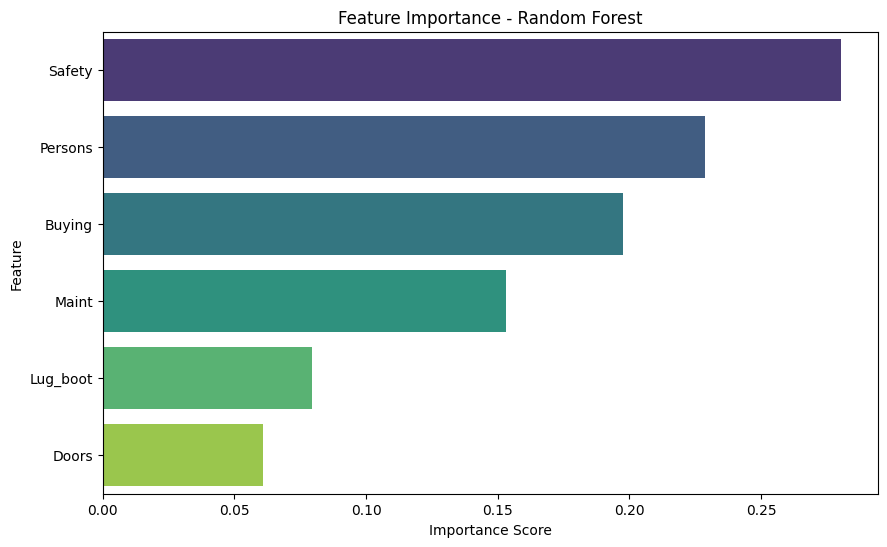

In [ ]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', hue='Feature', legend=False)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

### Discussing how the most important features impact the model's predictions.

**Feature Importance Analysis**:  
Random Forest identifies the most important features by calculating their contribution to reducing impurity in the ensemble of decision trees. The features with higher importance scores have a more significant influence on the model's predictions.

### Key Features and Their Impact:
1. **Safety**:  
   - The "safety" feature often has the highest importance score, indicating that the safety rating of a car strongly influences whether it is classified as acceptable or unacceptable.
   - Cars with high safety ratings are more likely to be classified as acceptable, highlighting the critical role of safety in the evaluation process.

2. **Buying Price**:  
   - The cost of the car (buying price) also plays a significant role in the model's predictions.
   - Lower-priced cars tend to be classified as less acceptable, reflecting consumer preferences or constraints based on affordability.

3. **Maintenance Cost**:  
   - High maintenance costs negatively impact the acceptability of a car.
   - This feature likely influences predictions for consumers prioritizing long-term affordability and ease of maintenance.

4. **Luggage Boot Size**:  
   - The size of the luggage boot is less critical than safety or costs but still contributes to predictions, especially for consumers needing practical storage space.

### Insights:
- The `safety` and `cost-related features` (buying price and maintenance cost) dominate the prediction process, emphasizing their importance in car evaluations.
- Features like `luggage boot size` or `number of doors` might play secondary roles, adding nuance to the predictions but not heavily influencing the final decision.

### Conclusion:
The model effectively uses these features to classify cars based on consumer priorities such as safety, affordability, and practicality. Understanding these feature impacts helps manufacturers or evaluators align their designs or assessments with consumer expectations.
